# Getting Started with Julia in Colab/Jupyter
You can either run this notebook in Google Colab, or using Jupyter on your own machine.

## Running on Google Colab
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia (the Jupyter kernel for Julia) and other packages. You can update `JULIA_VERSION` and the other parameters, if you know what you're doing. Installation takes 2-3 minutes.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the _Checking the Installation_ section.

* _Note_: If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia Images"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-10-15 12:08:34 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package Images...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


## Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system (if you ever ask for help or file an issue about Julia, you should always provide this information).

In [ ]:
versioninfo()

Julia Version 1.6.0
Commit f9720dc2eb (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 4


## Imports

In [ ]:
using Images

# Fun With images

## Gettting Familiar

In [ ]:
url = "https://images.unsplash.com/photo-1634034464593-5b252db180b3?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=871&q=80"

download(url,"pumpkin.jpg")

"pumpkin.jpg"

In [ ]:
philip = load("pumpkin.jpg")

In [ ]:
typeof(philip)

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

In [ ]:
size(philip)

(581, 871)

In [ ]:
philip[400,400]

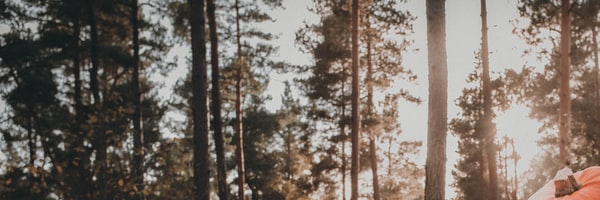

In [ ]:
philip[1:200,1:600]

In [ ]:
(h,w) = size(philip)

(581, 871)

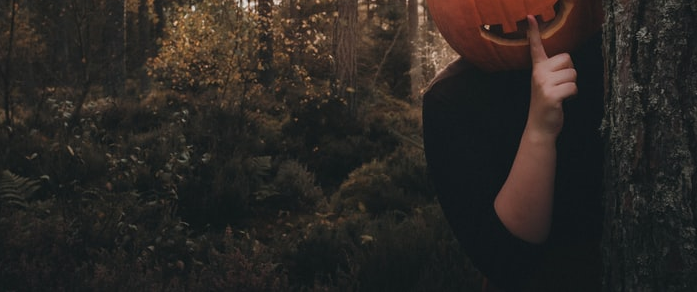

In [ ]:
(h, w) = size(philip)
head = philip[(h ÷ 2):h,(w ÷ 10):(9w ÷ 10)]

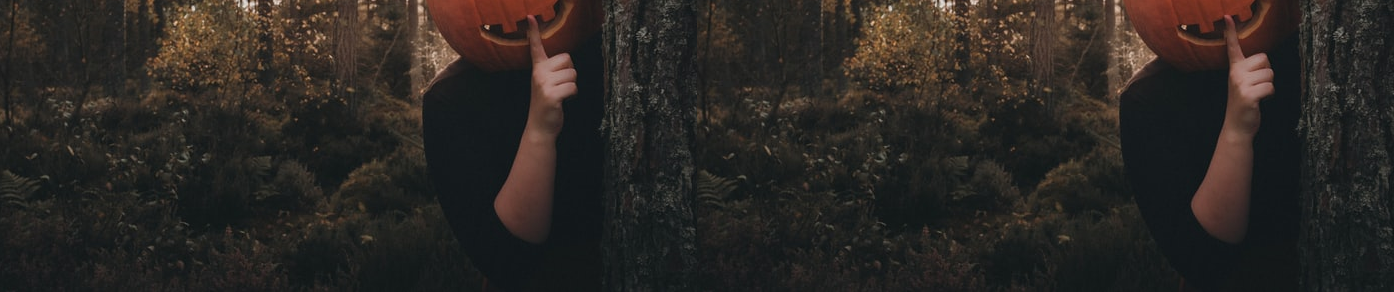

In [ ]:
[head head]

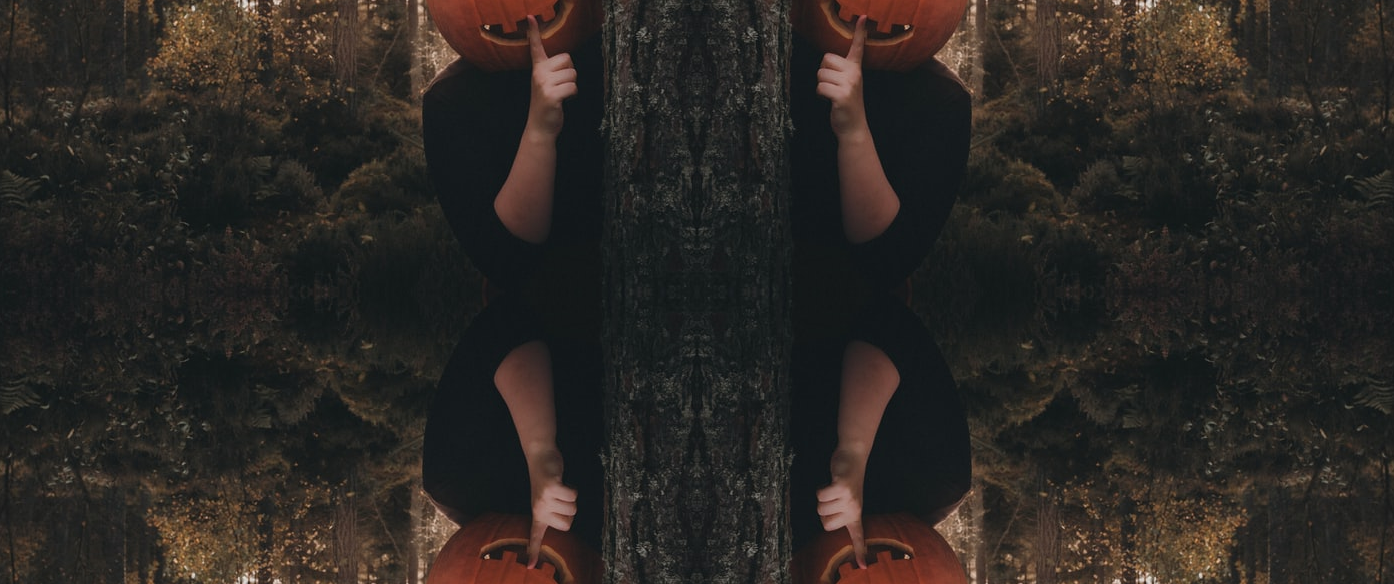

In [ ]:
[head reverse(head, dims=2)
reverse(head,dims=1) reverse(reverse(head,dims=1), dims=2)]

## Working with images

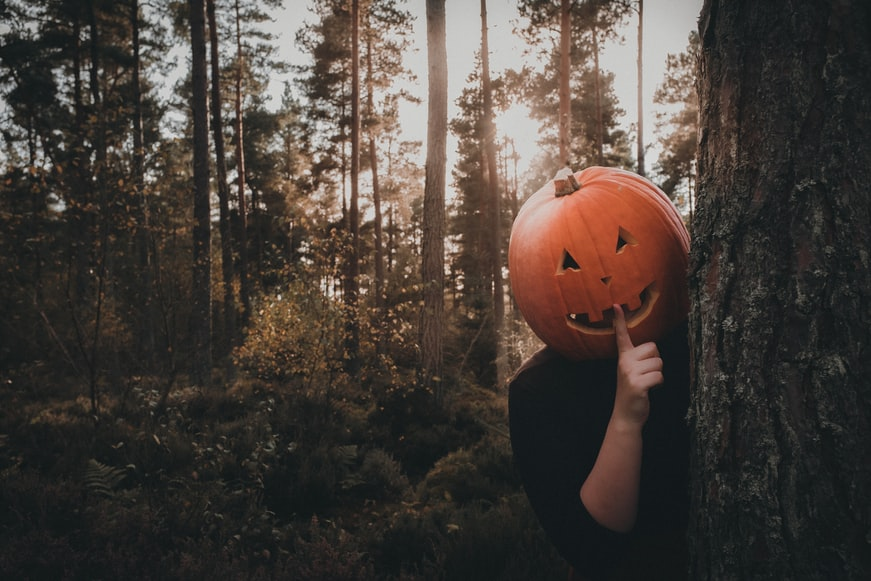

In [ ]:
new_phil = copy(philip)

In [ ]:
red = RGB(1, 0, 0)
for i in 1:100
    for j in 1:100
        new_phil[i,j] = red
    end
end
new_phil

### Broadcasting

In [ ]:
new_phil2 = copy(new_phil)
green = RGB(0,1,0)
new_phil2[235:end,300:500] .= green
new_phil2

### Broadcasting on Functions

In [ ]:
function redify(color)
    return RGB(color.r, 0, 0)
end

redify (generic function with 1 method)

In [ ]:
color = RGB(0.8, 0.5, 0.2)
[color, redify(color)]

In [ ]:
color = RGB(0.1, 0.5, 0.2)
[color, redify(color)]

In [ ]:
redify.(philip)

# Abstraction

In [ ]:
element = 1
fill(element, 3, 4)

3×4 Matrix{Int64}:
 1  1  1  1
 1  1  1  1
 1  1  1  1

In [ ]:
element = 1.0
fill(element, 3, 4)

3×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [ ]:
keeptrack = [ typeof(1), typeof(1.0), typeof("one"), typeof(1//1)]

4-element Vector{DataType}:
 Int64
 Float64
 String
 Rational{Int64}

In [ ]:
element = "one"
fill(element, 3, 4)

3×4 Matrix{String}:
 "one"  "one"  "one"  "one"
 "one"  "one"  "one"  "one"
 "one"  "one"  "one"  "one"

In [ ]:
element = 1//1
fill(element, 3, 4)

3×4 Matrix{Rational{Int64}}:
 1//1  1//1  1//1  1//1
 1//1  1//1  1//1  1//1
 1//1  1//1  1//1  1//1

In [ ]:
element = 1.0
fill(element, 3, 4)

# Arrays

In [ ]:
v = [1,2,3,4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [ ]:
w = [ 1 2 3
      4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [ ]:
size(w)

(2, 3)

In [ ]:
w[:,1]

2-element Vector{Int64}:
 1
 4

In [ ]:
A1 = rand(1:9, 3, 4)

3×4 Matrix{Int64}:
 4  1  9  7
 1  2  1  2
 8  3  8  1

In [ ]:
A2 = string.(rand("🥱😴🤤😵🤐🥴🤢🤮🤧😷🤒🤕🤑🤠😈👿",3,4))

3×4 Matrix{String}:
 "🤕"  "😈"  "🥴"  "🤑"
 "🤮"  "🤐"  "🤕"  "👿"
 "😴"  "🥴"  "😵"  "🤮"

In [ ]:
colors = distinguishable_colors(5)

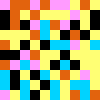

In [ ]:
A3 = rand(colors,10,10)

In [ ]:
colors = distinguishable_colors(10)

In [ ]:
A3 = rand(colors,10,10)

In [ ]:
D = [ i * j for i = 1:10,j = 1:10]

10×10 Matrix{Int64}:
  1   2   3   4   5   6   7   8   9   10
  2   4   6   8  10  12  14  16  18   20
  3   6   9  12  15  18  21  24  27   30
  4   8  12  16  20  24  28  32  36   40
  5  10  15  20  25  30  35  40  45   50
  6  12  18  24  30  36  42  48  54   60
  7  14  21  28  35  42  49  56  63   70
  8  16  24  32  40  48  56  64  72   80
  9  18  27  36  45  54  63  72  81   90
 10  20  30  40  50  60  70  80  90  100

In [ ]:
D^2

10×10 Matrix{Int64}:
  385   770   1155   1540   1925   2310   2695   3080   3465   3850
  770  1540   2310   3080   3850   4620   5390   6160   6930   7700
 1155  2310   3465   4620   5775   6930   8085   9240  10395  11550
 1540  3080   4620   6160   7700   9240  10780  12320  13860  15400
 1925  3850   5775   7700   9625  11550  13475  15400  17325  19250
 2310  4620   6930   9240  11550  13860  16170  18480  20790  23100
 2695  5390   8085  10780  13475  16170  18865  21560  24255  26950
 3080  6160   9240  12320  15400  18480  21560  24640  27720  30800
 3465  6930  10395  13860  17325  20790  24255  27720  31185  34650
 3850  7700  11550  15400  19250  23100  26950  30800  34650  38500

In [ ]:
D.^2

10×10 Matrix{Int64}:
   1    4    9    16    25    36    49    64    81    100
   4   16   36    64   100   144   196   256   324    400
   9   36   81   144   225   324   441   576   729    900
  16   64  144   256   400   576   784  1024  1296   1600
  25  100  225   400   625   900  1225  1600  2025   2500
  36  144  324   576   900  1296  1764  2304  2916   3600
  49  196  441   784  1225  1764  2401  3136  3969   4900
  64  256  576  1024  1600  2304  3136  4096  5184   6400
  81  324  729  1296  2025  2916  3969  5184  6561   8100
 100  400  900  1600  2500  3600  4900  6400  8100  10000